In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [165]:
data= pd.read_csv('/content/drive/MyDrive/Cars Sales/car_data.csv')

In [150]:
data

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [167]:
data.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [168]:
# Drop irrelevant columns or those with too many unique values
data = data.drop(['Car_id','Dealer_Name', 'Customer Name', 'Phone', 'Dealer_No ','Gender','Annual Income'], axis=1)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Company        23906 non-null  object
 2   Model          23906 non-null  object
 3   Engine         23906 non-null  object
 4   Transmission   23906 non-null  object
 5   Color          23906 non-null  object
 6   Price ($)      23906 non-null  int64 
 7   Body Style     23906 non-null  object
 8   Dealer_Region  23906 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [170]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
data['Company'] = label_encoder.fit_transform(data['Company'])
data['Model'] = label_encoder.fit_transform(data['Model'])
data['Engine'] = label_encoder.fit_transform(data['Engine'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data['Body Style'] = label_encoder.fit_transform(data['Body Style'])
data['Dealer_Region'] = label_encoder.fit_transform(data['Transmission'])
data['Color'] = label_encoder.fit_transform(data['Body Style'])

In [171]:
data['Date'] = pd.to_datetime(data['Date'])

In [172]:
# Extract year, month, day, etc.
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['WeekOfYear'] = data['Date'].dt.isocalendar().week  # Week number
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend flag

# Days since a reference date (e.g., the earliest date in the dataset)
data['DaysSinceReference'] = (data['Date'] - data['Date'].min()).dt.days

In [173]:
data.drop('Date', axis=1, inplace=True)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             23906 non-null  int64 
 1   Model               23906 non-null  int64 
 2   Engine              23906 non-null  int64 
 3   Transmission        23906 non-null  int64 
 4   Color               23906 non-null  int64 
 5   Price ($)           23906 non-null  int64 
 6   Body Style          23906 non-null  int64 
 7   Dealer_Region       23906 non-null  int64 
 8   Year                23906 non-null  int32 
 9   Month               23906 non-null  int32 
 10  Day                 23906 non-null  int32 
 11  DayOfWeek           23906 non-null  int32 
 12  WeekOfYear          23906 non-null  UInt32
 13  IsWeekend           23906 non-null  int64 
 14  DaysSinceReference  23906 non-null  int64 
dtypes: UInt32(1), int32(4), int64(10)
memory usage: 2.3 MB


In [176]:
# Handle missing values if any
data = data.dropna()

In [177]:
# Separate features (X) and target (y)
X = data.drop('Price ($)', axis=1)  # Features
y = data['Price ($)']  # Target

In [178]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [185]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 210715000.10400805
R-squared: 0.00452057903474834


In [186]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [187]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 159212550.93394879
R-squared: 0.24783324425932385


## **By RandomForest**

<ipython-input-193-ee65d08cd620>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


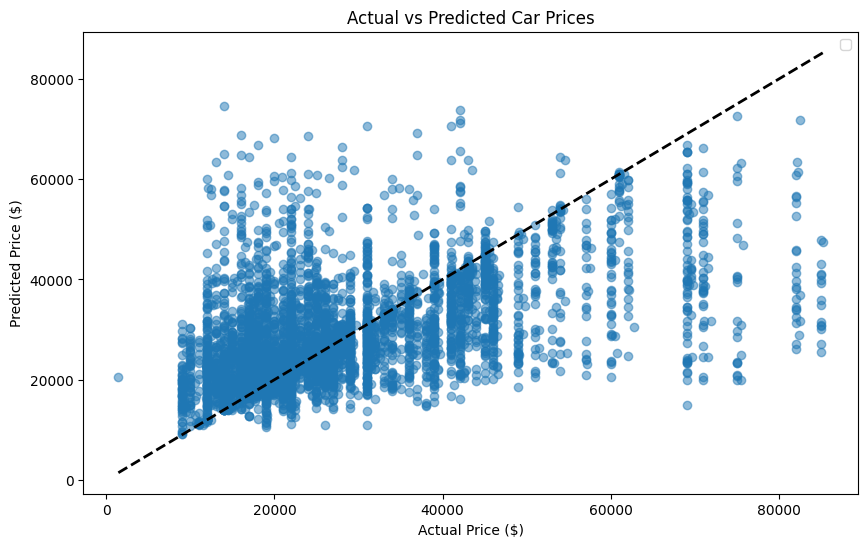

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Car Prices')
plt.show()

## **By Linear Regression**

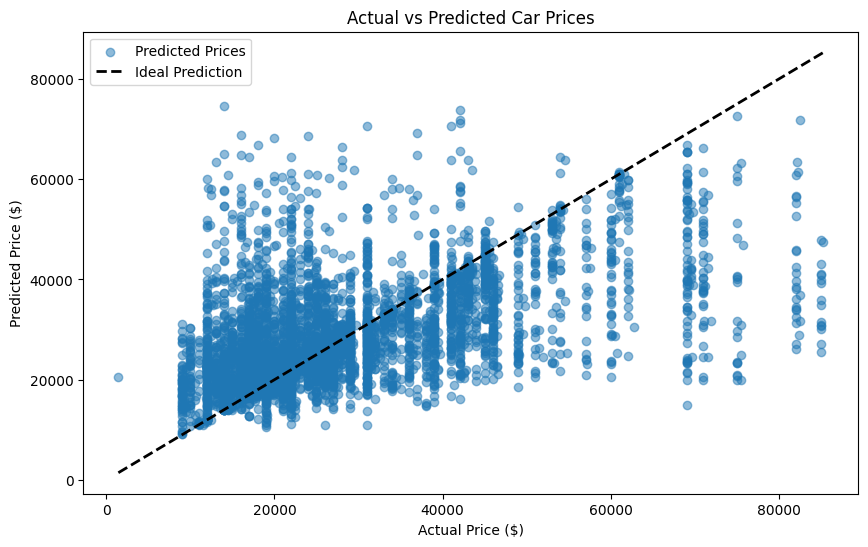

In [191]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()

## **feature importances**

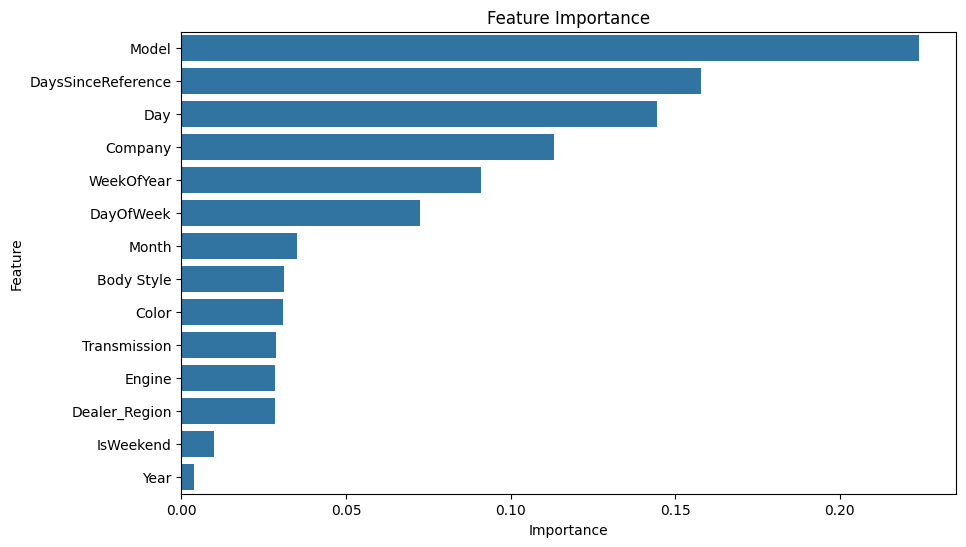

In [189]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## **Predicted Price for the New Car**

In [190]:
# Example: Create a new hypothetical car
new_car = {
    'Company': ['Toyota'],
    'Model': ['Camry'],
    'Engine': ['Double Overhead Camshaft'],
    'Transmission': ['Auto'],
    'Body Style': ['SUV'],
    'Dealer_Region': ['North America'],
    'Color': ['Black'],
    'Year': [2023],
    # Add other features as needed
}

# Convert the new car data into a DataFrame
new_car_df = pd.DataFrame(new_car)

# One-hot encode the new car data (ensure it matches the training data format)
new_car_df = pd.get_dummies(new_car_df)

# Align columns with the training data (add missing columns and remove extra ones)
new_car_df = new_car_df.reindex(columns=X.columns, fill_value=0)

# Predict the price for the new car
predicted_price = model.predict(new_car_df)
print(f"Predicted Price for the New Car: ${predicted_price[0]:.2f}")

Predicted Price for the New Car: $44984.25
